In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from matplotlib.ticker import FormatStrFormatter, MaxNLocator, FuncFormatter

# Path to the NetCDF file
file_path='/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/SSH/sla/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_1720009044284.nc'
ds=xr.open_dataset(file_path)

# Extract SSH variable
ssh=ds['sla']#adt sla
#ssh=ds['adt']

# Assuming 'latitude' is the variable that defines latitude values
lat_values=ds['latitude']
#print(lat_values)

In [2]:
# Compute the latitudinal average between 29ºN and 24ºN (all the latitudes downloaded)
ssh_avg=ssh.mean(dim='latitude')

# Compute mean SSH over time for the latitudinally averaged data
mean_ssh=ssh_avg.mean(dim='time')

# Compute SSHA (Sea Surface Height Anomalies)
ssha=ssh_avg-mean_ssh

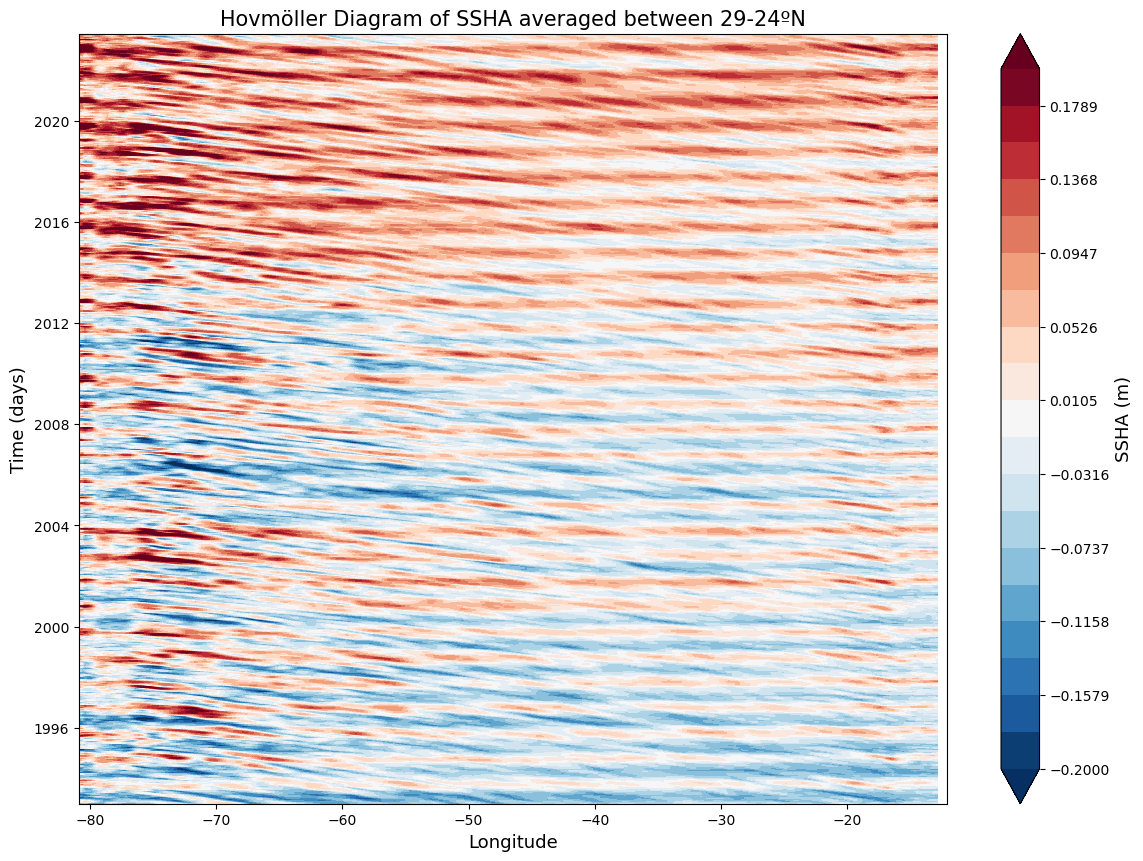

In [3]:
# Create a Hovmöller plot (longitude vs time)
fig, ax=plt.subplots(figsize=(14, 10))
cmap=plt.get_cmap('RdBu_r')  # Choose colormap
levels=np.linspace(-0.2, 0.2, 20)
contour=ax.contourf(ssha['longitude'], ssha['time'].values, ssha.values, levels=levels, cmap=cmap, extend='both')
cbar=plt.colorbar(contour,ax=ax,orientation='vertical')
cbar.set_label('SSHA (m)',fontsize=13)
ax.set_title('Hovmöller Diagram of SSHA averaged between 29-24ºN',fontsize=15)
ax.set_xlabel('Longitude',fontsize=13)
ax.set_ylabel('Time (days)',fontsize=13)
plt.show()

In [5]:
# Remove global mean sea level rise (about 21 cm) from SSHA
gmsl_file_path='/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/GlobalMeanSL_Rise/omi_climate_sl_global_area_averaged_anomalies_19930101_P20240228.nc'
# Open the GMSL dataset
gmsl_ds=xr.open_dataset(gmsl_file_path)
gmsl=gmsl_ds['MSL_filtered_GIA_TPA_corrected_adjusted']  # Use the correct variable
#print(gmsl)
#print(ssha) #they have the same time variable

# Remove GMSL (/100 from cm to m) from the SSHA
ssha_corrected=ssha-gmsl/100

# Remove the steric contribution, Compute the zonal mean (mean across all longitudes) at each time step
zonal_mean = ssha_corrected.mean(dim='longitude')
ssha_deseasonalized = ssha_corrected - zonal_mean

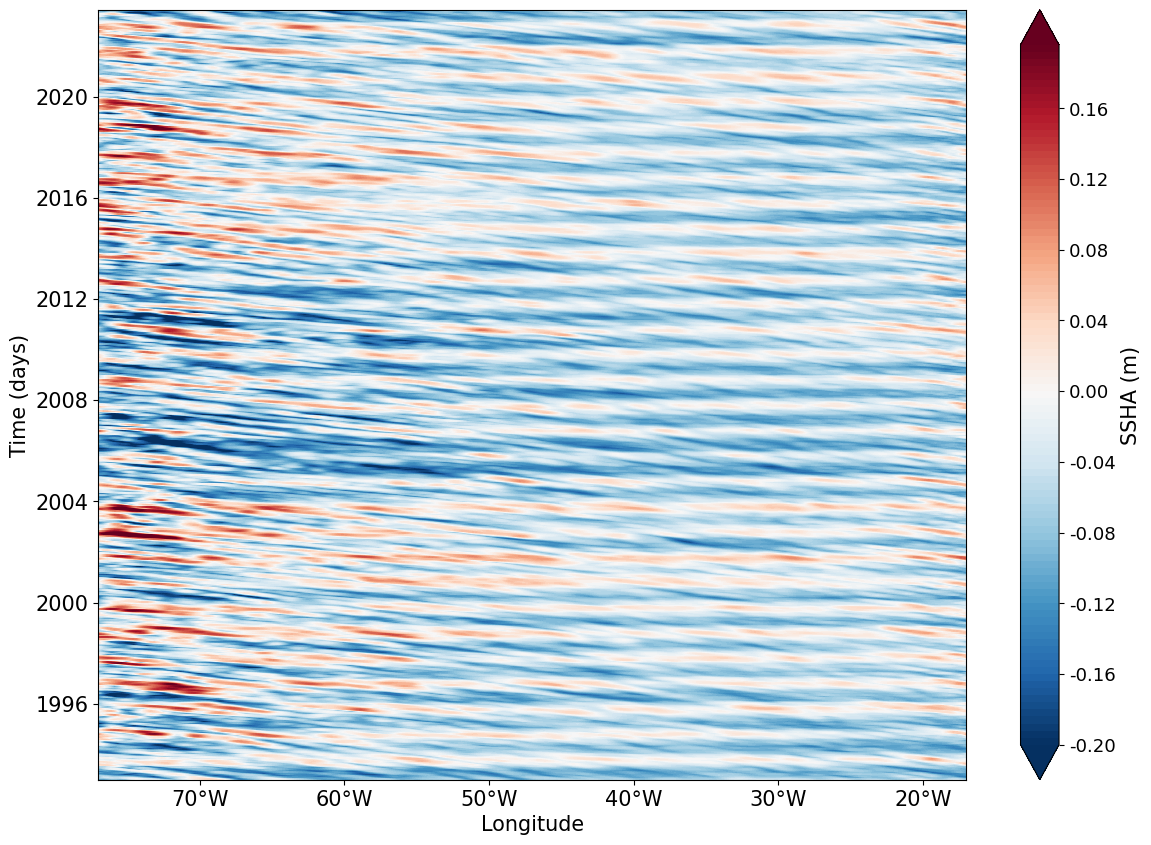

In [7]:
# Function: format the x-axis ticks with 'W' for western longitudes
def format_longitude(value, pos):
    return f'{int(abs(value))}°W' 
fig, ax = plt.subplots(figsize=(14, 10))
cmap = plt.get_cmap('RdBu_r')
levels = np.linspace(-0.2, 0.2, 100) 
contour = ax.contourf(ssha_corrected['longitude'], ssha_corrected['time'].values, ssha_corrected.values, levels=levels, cmap=cmap, extend='both')
cbar = plt.colorbar(contour, ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=13)
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FuncFormatter(format_longitude))
cbar.set_label('SSHA (m)', fontsize=15)
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Time (days)', fontsize=15)
ax.set_xlim([-77, -17])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

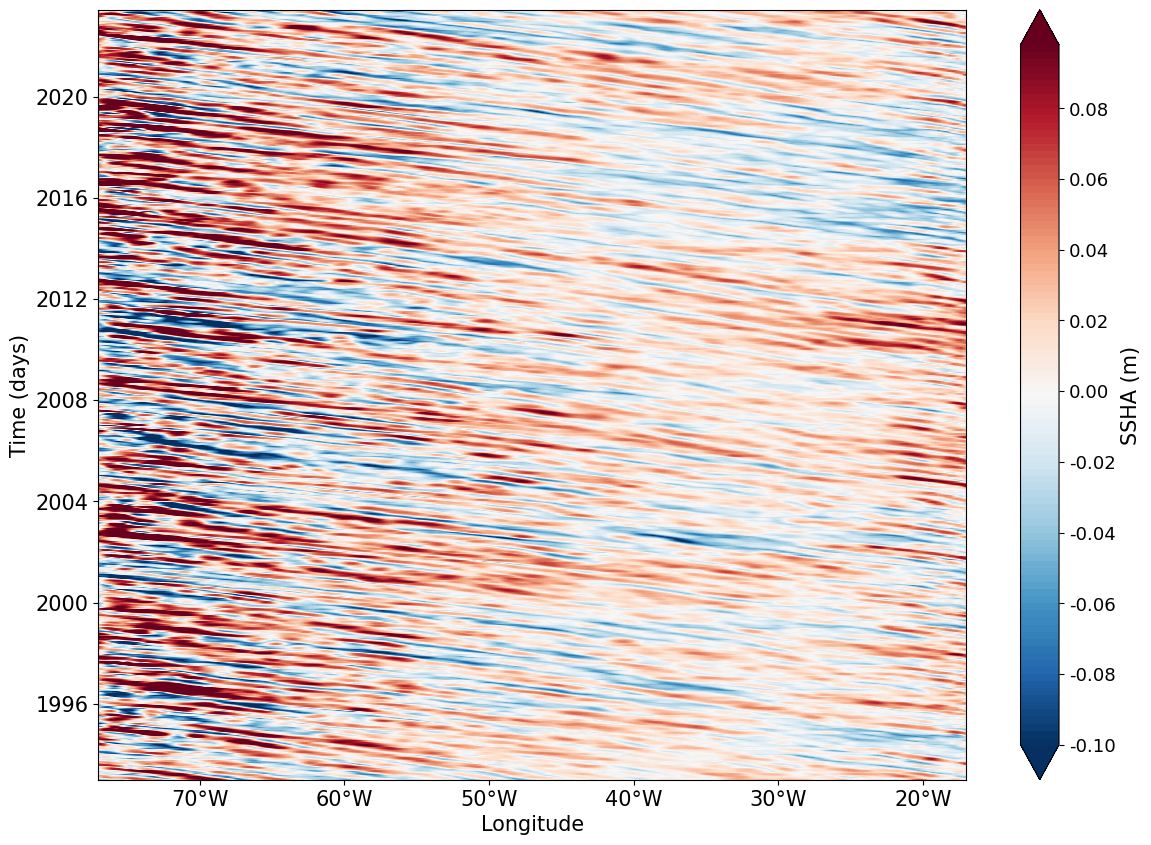

In [6]:
# Function: format the x-axis ticks with 'W' for western longitudes
def format_longitude(value, pos):
    return f'{int(abs(value))}°W'  # Use the Unicode degree symbol (U+00B0)

fig, ax = plt.subplots(figsize=(14, 10))
cmap = plt.get_cmap('RdBu_r') 
levels = np.linspace(-0.1, 0.1, 100)  
contour = ax.contourf(ssha_deseasonalized['longitude'], ssha_deseasonalized['time'].values, ssha_deseasonalized.values, levels=levels, cmap=cmap, extend='both')
cbar = plt.colorbar(contour, ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=13)
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FuncFormatter(format_longitude))
cbar.set_label('SSHA (m)', fontsize=15)
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Time (days)', fontsize=15)
ax.set_xlim([-77, -17])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()